In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt

In [2]:
DATASET_PATH = os.path.join(os.getcwd(), 'dataset')
print(DATASET_PATH)

e:\MSU\ML\week1\dataset


In [3]:
data = pd.read_csv(os.path.join(DATASET_PATH, 'iris.csv'))
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


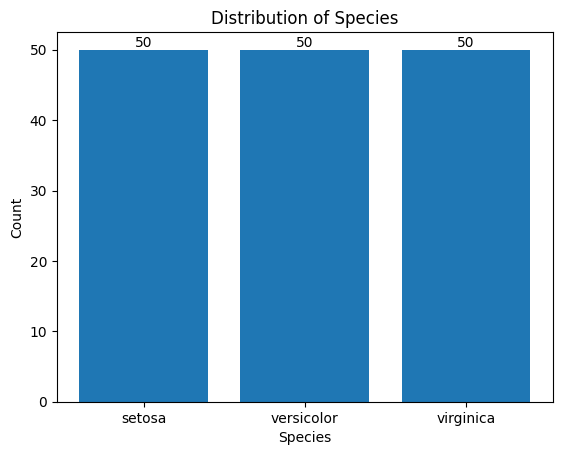

In [4]:
# bar graph of the data by species
plt.title('Distribution of Species')
plt.bar(data['species'].unique(), data['species'].value_counts())
for i, v in enumerate(data['species'].value_counts()):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

In [5]:
# Preparing Data by Holdout Method
Xdata = data.drop('species', axis=1)
ydata = data['species']
# 60:40 split
X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=0.4, random_state=42)
print(f"Training data shape: X:{X_train.shape}   y:{y_train.shape}")
print(f"Testing data shape: X:{X_test.shape}   y:{y_test.shape}")

Training data shape: X:(90, 4)   y:(90,)
Testing data shape: X:(60, 4)   y:(60,)


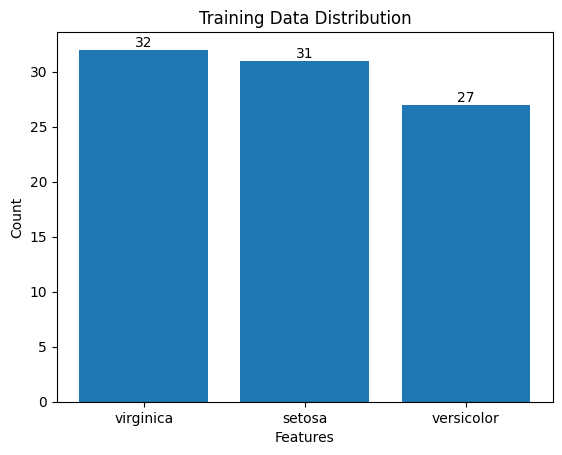

In [6]:
plt.title('Training Data Distribution')
plt.bar(y_train.unique(), y_train.value_counts())
for i, v in enumerate(y_train.value_counts()):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xlabel('Features')
plt.ylabel('Count')
plt.show()

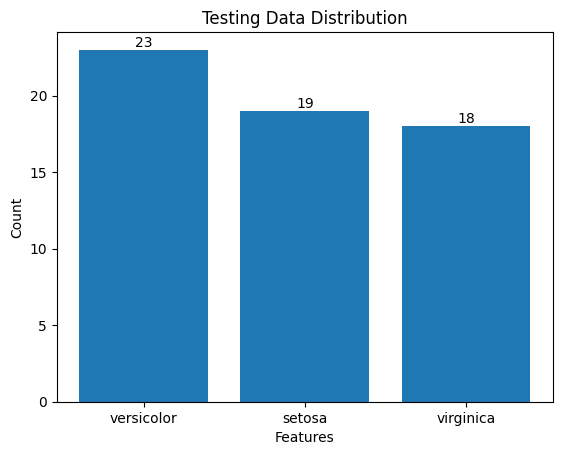

In [7]:
plt.title('Testing Data Distribution')
plt.bar(y_test.unique(), y_test.value_counts())
for i, v in enumerate(y_test.value_counts()):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xlabel('Features')
plt.ylabel('Count')
plt.show()

In [8]:
# Preparing Data K-Fold Cross-Validation
data = np.array(data)
X = np.array(Xdata)
Y = np.array(ydata)

print(X.shape, Y.shape)
print(X)
print(Y)

(150, 4) (150,)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1

In [9]:
kf = KFold(n_splits=2, shuffle=True, random_state=150)
for train_indices, test_indices in kf.split(X, Y):
    print(f"Train indices: {train_indices.shape}   Test indices: {test_indices.shape}")
    print(train_indices, test_indices)
    print(data[train_indices], ydata[train_indices])


Train indices: (75,)   Test indices: (75,)
[  0   1   4   5   7   9  10  12  14  15  17  18  19  22  23  24  25  26
  29  37  38  44  45  46  49  50  51  55  56  58  61  64  66  67  68  70
  74  75  77  80  81  89  92  93  94  95 100 101 102 103 104 105 106 107
 108 110 112 115 116 120 121 122 123 126 127 130 132 133 135 138 142 146
 147 148 149] [  2   3   6   8  11  13  16  20  21  27  28  30  31  32  33  34  35  36
  39  40  41  42  43  47  48  52  53  54  57  59  60  62  63  65  69  71
  72  73  76  78  79  82  83  84  85  86  87  88  90  91  96  97  98  99
 109 111 113 114 117 118 119 124 125 128 129 131 134 136 137 139 140 141
 143 144 145]
[[5.1 3.5 1.4 0.2 'setosa']
 [4.9 3.0 1.4 0.2 'setosa']
 [5.0 3.6 1.4 0.2 'setosa']
 [5.4 3.9 1.7 0.4 'setosa']
 [5.0 3.4 1.5 0.2 'setosa']
 [4.9 3.1 1.5 0.1 'setosa']
 [5.4 3.7 1.5 0.2 'setosa']
 [4.8 3.0 1.4 0.1 'setosa']
 [5.8 4.0 1.2 0.2 'setosa']
 [5.7 4.4 1.5 0.4 'setosa']
 [5.1 3.5 1.4 0.3 'setosa']
 [5.7 3.8 1.7 0.3 'setosa']
 [5.1 3.8